# Inport Packages

In [1]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

# Import Dataset

In [2]:
# read data file into dataframe
df = pd.read_csv('Assignment_3_data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [3]:
# data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


# Scaling using StandardScaler and train test split

In [4]:
# Scaling the data
X = df.drop(['TARGET CLASS'],axis=1).values
Y = df['TARGET CLASS']

# Need to scale all X features to a standard scale
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 42)

# Basic KNN with 1 Neighbor

In [5]:
# KNN fit with 1 neighbor
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, pred))
print('-------------------------------------------------------')
# classification report
print('Classification Report:')
print(classification_report(Y_test,pred))

Confusion Matrix:
[[110  36]
 [ 47 107]]
-------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



**The basic KNN model has only 72% accuracy.**

# Elbow method to find optimal K-factor value

In [6]:
#Elbow method to get correct k value
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

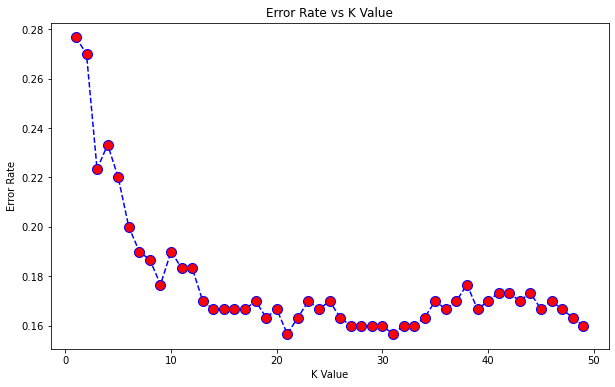

In [7]:
# plotting error rates by k-factor values
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [8]:
# getting the K-value for the minimum error rate
for k,i in enumerate(error_rate):
    if i == min(error_rate):
        print(k)

20
30


**So, for k = 20 and k = 30, we will have lowest error rate.**

# KNN with k = 20

In [9]:
# KNN fit with 20 neighbors
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, pred))
print('-------------------------------------------------------')
# classification report
print('Classification Report:')
print(classification_report(Y_test,pred))

Confusion Matrix:
[[128  18]
 [ 32 122]]
-------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.87      0.79      0.83       154

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



# KNN with k = 30

In [10]:
# KNN fit with 30 neighbors
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, pred))
print('-------------------------------------------------------')
# classification report
print('Classification Report:')
print(classification_report(Y_test,pred))

Confusion Matrix:
[[127  19]
 [ 29 125]]
-------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       146
           1       0.87      0.81      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



### We got the highst accuracy with k = 30.

In [11]:
# square root of data points method
import math
math.sqrt(1000)

31.622776601683793

Even with square root of data point method we see optimal K-factor value shoule be around 30.